Importer les données à l'aide de la bibliothèque Pandas.

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
df =  pd.read_csv("assurance-maladie.csv")

print(df)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Comprendre la structure générale du jeu de données (types de données, dimensions, aperçus).

In [4]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [5]:
numeriques = df.select_dtypes(include=["int64", "float64"])
print(numeriques.median())

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64


In [6]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [7]:
categoriques = df.select_dtypes(include=["object"])
print(categoriques.describe())

         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


In [8]:
for i in categoriques :
    freq = df.groupby([i]).count()
    print(freq["age"])


sex
female    662
male      676
Name: age, dtype: int64
smoker
no     1064
yes     274
Name: age, dtype: int64
region
northeast    324
northwest    325
southeast    364
southwest    325
Name: age, dtype: int64


In [9]:
NullCount = df.isnull().sum()
print(NullCount)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [10]:
Duplicated = df.duplicated(subset=["sex"])
print(Duplicated)

0       False
1       False
2        True
3        True
4        True
        ...  
1333     True
1334     True
1335     True
1336     True
1337     True
Length: 1338, dtype: bool


In [11]:
print("Nombre de doublons :", df.duplicated().sum())

print(df[df.duplicated(keep=False)])


Nombre de doublons : 1
     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [12]:

print(df[df.isnull().any(axis = 1)])

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


Analyser la distribution des variables numériques (ex. : histogrammes avec Matplotlib/Seaborn).


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
numeriques = df.select_dtypes(include=["int64", "float64"])

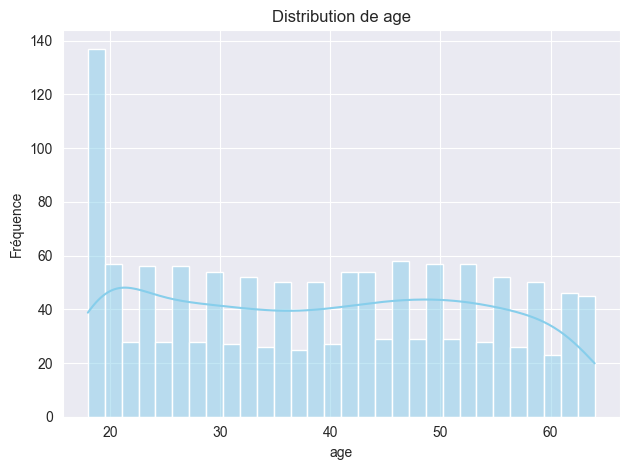

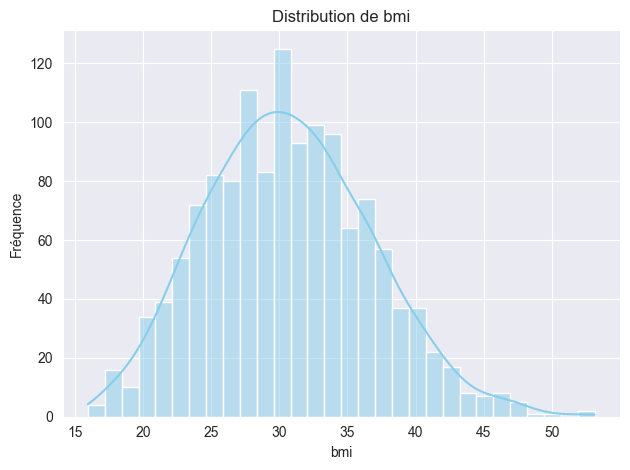

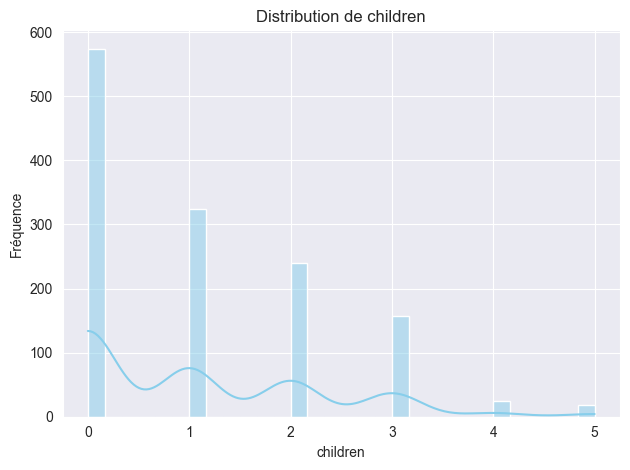

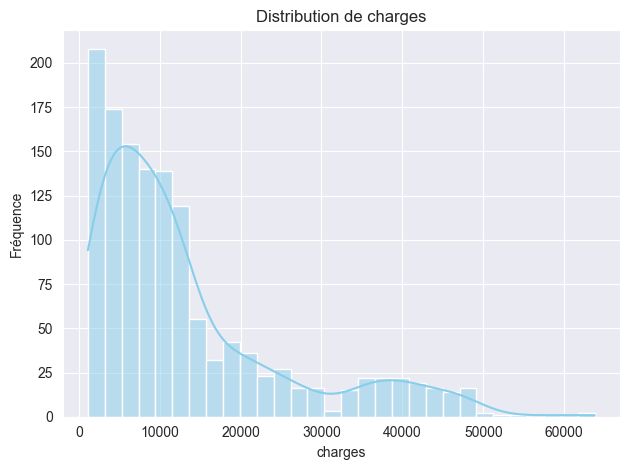

In [14]:
for col in numeriques.columns:
    plt.show()
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [15]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)


               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


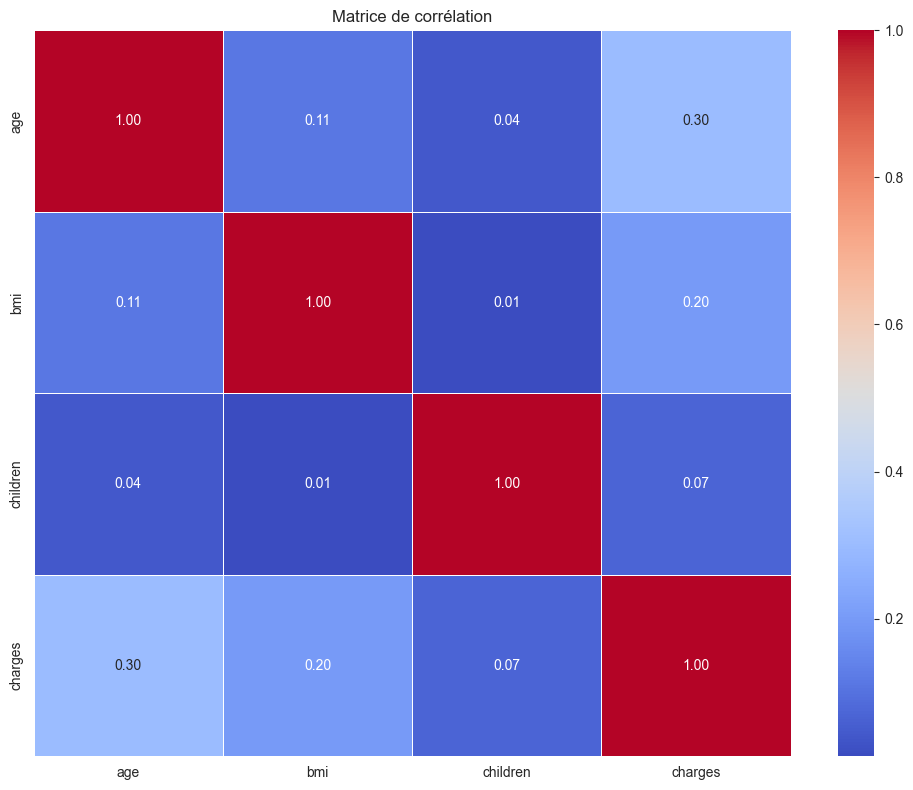

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

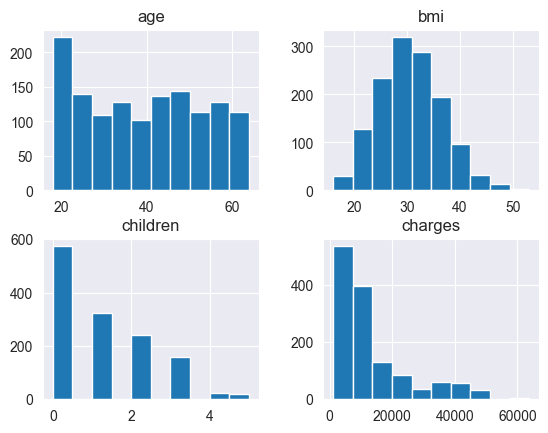

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()
df.hist()

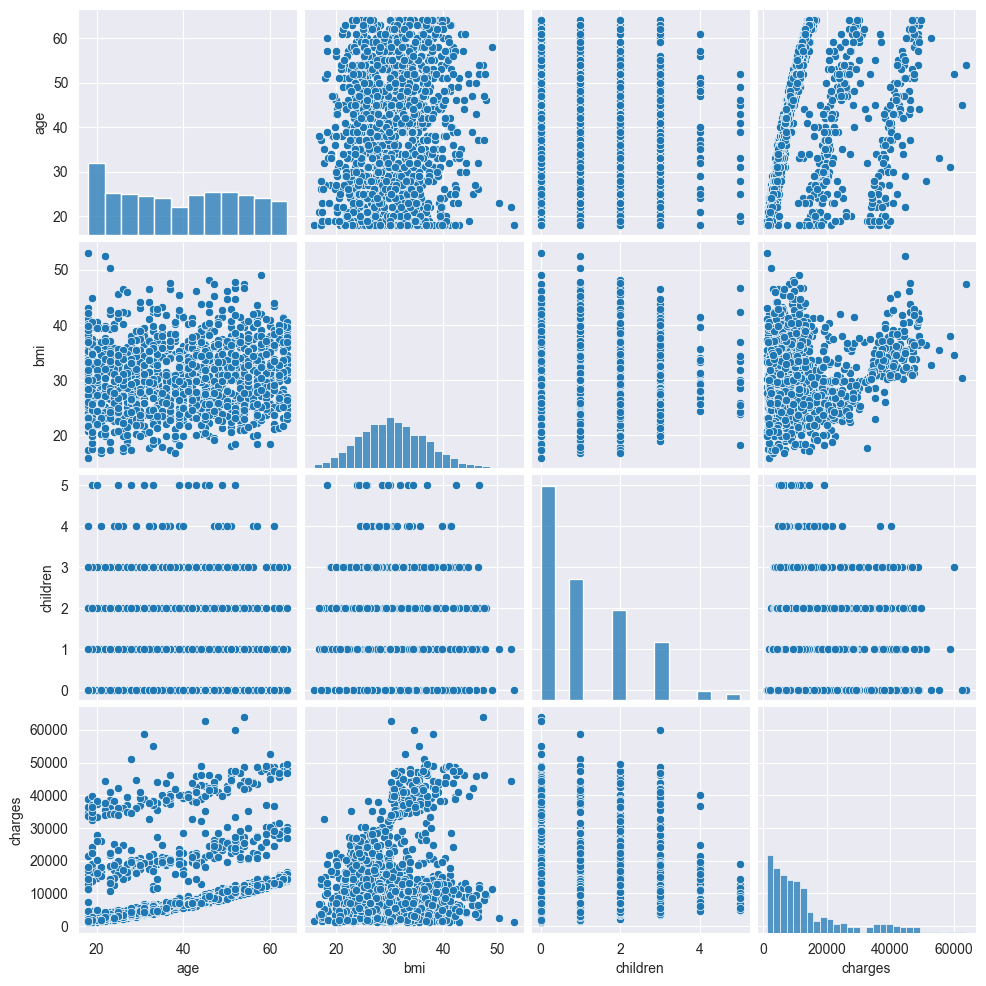

In [17]:
sns.pairplot(df[["age","bmi","children","charges"]])

In [18]:
strong_corr = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
print(strong_corr)

          age  bmi  children  charges
age       1.0  NaN       NaN      NaN
bmi       NaN  1.0       NaN      NaN
children  NaN  NaN       1.0      NaN
charges   NaN  NaN       NaN      1.0


In [19]:
import statistics
for i in numeriques :
    mediane = df[i].median()
    df.loc[:, i] = df[i].fillna(mediane)
for i in categoriques :
    statistics.mode(df)


Suppression des doublons.

In [20]:
print("Nombre de doublons :", df.duplicated().sum())

# print(df[df.duplicated()].index[0])
df.drop_duplicates( inplace=True)
df.to_csv("assurance_cleaned_version")# testJira1

Nombre de doublons : 1


Détection et gestion des valeurs aberrantes : Utiliser des techniques statistiques (ex. : boîte à moustaches avec Seaborn, z-score > 3, ou IQR pour identifier les outliers) et gérer les lignes

<Axes: xlabel='smoker', ylabel='charges'>

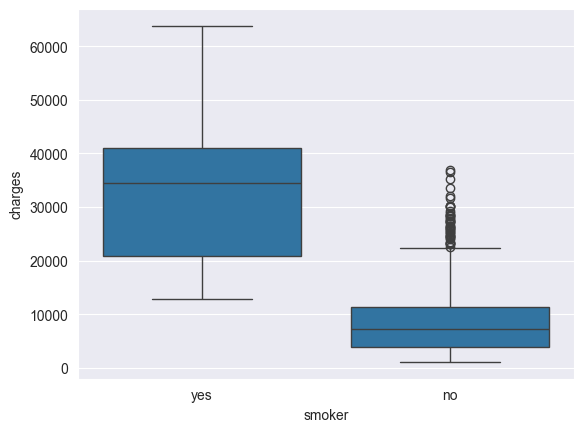

In [21]:
import seaborn

seaborn.boxplot(y =df['charges'] ,x = df['smoker'] )

In [107]:
import numpy as np

data = [5]
IQRs = {}
Q1 = np.percentile(df['bmi'], 25)
Q3 = np.percentile(df['bmi'], 75)
IQR = Q3 - Q1
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print(numeriques.columns)
for i in numeriques.columns :
    Q1 = np.percentile(df[i], 25)
    Q3 = np.percentile(df[i], 75)
    IQR = Q3 - Q1
    IQRs[i] = IQR
    lower_limit = Q1 - IQR * 1.5
    upper_limit = Q3 + IQR * 1.5
    outliers = df[(df[i] < lower_limit) | (df[i] > upper_limit)]
    df_filtered = df[(df[i] >= lower_limit) & (df[i] <= upper_limit)]

print(df_filtered.describe())
# print(df.head())

# seaborn.boxplot(y =df_filtered['charges'] , x = df_filtered['smoker'] )
df_filtered.info()
# print(IQRs)

Q1: 26.29
Q3: 34.7
IQR: 8.410000000000004
Index(['age', 'bmi', 'children', 'charges'], dtype='object')
               age          bmi     children       charges
count  1198.000000  1198.000000  1198.000000   1198.000000
mean     39.006678    30.094787     1.085142   9934.671758
std      14.062040     6.013044     1.214407   7240.216987
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    25.800000     0.000000   4418.591062
50%      39.000000    29.735000     1.000000   8411.754950
75%      51.000000    33.820000     2.000000  12955.356300
max      64.000000    53.130000     5.000000  34472.841000
<class 'pandas.core.frame.DataFrame'>
Index: 1198 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1198 non-null   int64  
 1   sex       1198 non-null   object 
 2   bmi       1198 non-null   float64
 3   children  1198 non-null   int64  
 4   smoker    1198 non-null   

Encoder les variables catégoriques (sexe, smoker, région) avec one-hot encoding ou label encoding.

In [108]:

from sklearn.preprocessing import OneHotEncoder
numeriques_filtred = df_filtered.select_dtypes(include=["int64", "float64"])
categoriques_filtred = df_filtered.select_dtypes(include=["object"])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(categoriques_filtred)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categoriques_filtred.columns))
df_filtered = pd.concat([df_filtered[numeriques_filtred.columns], encoded_df], axis=1)

df_filtered = df_filtered.drop(columns=['sex_female', 'smoker_no','region_northwest','region_southwest'])

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1323 entries, 0 to 1186
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1198 non-null   float64
 1   bmi               1198 non-null   float64
 2   children          1198 non-null   float64
 3   charges           1198 non-null   float64
 4   sex_male          1198 non-null   float64
 5   smoker_yes        1198 non-null   float64
 6   region_northeast  1198 non-null   float64
 7   region_southeast  1198 non-null   float64
dtypes: float64(8)
memory usage: 93.0 KB


In [98]:
df_filtered

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_southeast
0,19.0,27.900,0.0,16884.92400,0.0,1.0,0.0,0.0
1,18.0,33.770,1.0,1725.55230,1.0,0.0,0.0,1.0
2,28.0,33.000,3.0,4449.46200,1.0,0.0,0.0,1.0
3,33.0,22.705,0.0,21984.47061,1.0,0.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1139,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1146,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0
1152,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
1156,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0


In [109]:
df_filtered.index.is_unique


True

In [ ]:
df_filtered

In [121]:

df_filteredX = df_filtered.dropna()

In [122]:
df_filteredX

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_southeast
0,19.0,27.900,0.0,16884.92400,0.0,1.0,0.0,0.0
1,18.0,33.770,1.0,1725.55230,1.0,0.0,0.0,1.0
2,28.0,33.000,3.0,4449.46200,1.0,0.0,0.0,1.0
3,33.0,22.705,0.0,21984.47061,1.0,0.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1193,48.0,36.575,0.0,8671.19125,1.0,0.0,0.0,0.0
1194,31.0,21.755,0.0,4134.08245,0.0,0.0,1.0,0.0
1195,19.0,27.930,3.0,18838.70366,0.0,0.0,0.0,1.0
1196,19.0,30.020,0.0,33307.55080,0.0,0.0,0.0,0.0


In [123]:
from sklearn.model_selection import train_test_split
X = df_filteredX.drop(columns=['charges'])
y = df_filteredX['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=104, shuffle=True)
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)

X_train:       age     bmi  children  sex_male  smoker_yes  region_northeast  \
13   56.0  39.820       0.0       0.0         0.0               0.0   
212  24.0  28.500       2.0       0.0         0.0               0.0   
556  46.0  33.440       1.0       0.0         0.0               0.0   
666  49.0  28.700       1.0       0.0         0.0               0.0   
754  24.0  33.630       4.0       1.0         0.0               1.0   
..    ...     ...       ...       ...         ...               ...   
582  39.0  45.430       2.0       0.0         0.0               0.0   
188  41.0  32.200       1.0       1.0         0.0               0.0   
732  24.0  30.100       3.0       0.0         0.0               0.0   
813  28.0  22.515       2.0       0.0         1.0               0.0   
80   31.0  26.885       1.0       0.0         0.0               0.0   

     region_southeast  
13                1.0  
212               1.0  
556               0.0  
666               0.0  
754               

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled[:5]


array([[ 1.20274447,  1.57711141, -0.8923782 , -0.98152266, -0.36731544,
        -0.54232614,  1.68236653],
       [-1.07483   , -0.32127661,  0.75597594, -0.98152266, -0.36731544,
        -0.54232614,  1.68236653],
       [ 0.49100245,  0.50717187, -0.06820113, -0.98152266, -0.36731544,
        -0.54232614, -0.59440079],
       [ 0.70452506, -0.28773619, -0.06820113, -0.98152266, -0.36731544,
        -0.54232614, -0.59440079],
       [-1.07483   ,  0.53903528,  2.40433008,  1.01882518, -0.36731544,
         1.84390889, -0.59440079]])